## Bedroom comparison


=== Local Noise Estimation in Bedroom Scenes ===
Real      Mean Std: 0.05859
GAN       Mean Std: 0.04905
Diffusion Mean Std: 0.05070


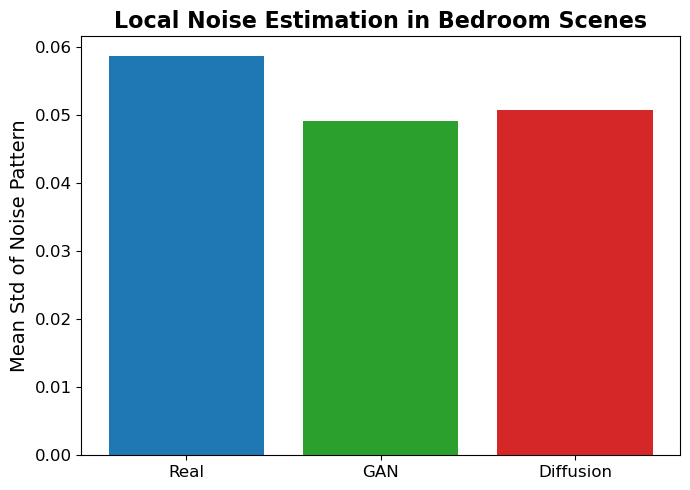


=== Wavelet Noise Energy in Bedroom Scenes ===
Real      Mean Std: 0.06827
GAN       Mean Std: 0.04746
Diffusion Mean Std: 0.05039


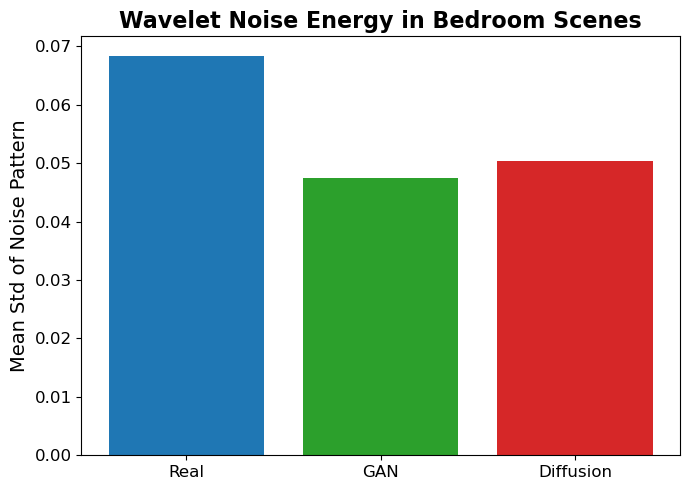

In [11]:
import cv2
import numpy as np
import pywt
import os
import matplotlib.pyplot as plt
from skimage.util import view_as_windows 


def estimate_local_noise(image, window_size=7):
    """Estimate local noise using a sliding window standard deviation"""
    padded_img = np.pad(image, pad_width=window_size//2, mode='reflect')
    windows = view_as_windows(padded_img, (window_size, window_size))
    noise_map = np.std(windows, axis=(2, 3))
    return noise_map


def extract_wavelet_noise(image, wavelet='db1', level=1):
    """Decompose image and return high-frequency noise components"""
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    noise_energy = np.sqrt(cH**2 + cV**2 + cD**2)
    return noise_energy


def process_folder(folder_path, method='local_noise', window_size=7, wavelet='db1'):
    noise_patterns = []
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = img.astype(np.float32) / 255.0

        if method == 'local_noise':
            noise_map = estimate_local_noise(img, window_size)
        elif method == 'wavelet':
            noise_map = extract_wavelet_noise(img, wavelet)
        else:
            raise ValueError("Unsupported method")

        noise_patterns.append(noise_map)
    return noise_patterns


def summarize_and_plot(real_np, gan_np, diff_np, title):
    real_std = np.mean([np.std(p) for p in real_np])
    gan_std  = np.mean([np.std(p) for p in gan_np])
    diff_std = np.mean([np.std(p) for p in diff_np])

    print(f"\n=== {title} ===")
    print(f"Real      Mean Std: {real_std:.5f}")
    print(f"GAN       Mean Std: {gan_std:.5f}")
    print(f"Diffusion Mean Std: {diff_std:.5f}")

    # pick a figure size (width, height) in inches
    fig, ax = plt.subplots(figsize=(7, 5))  

    # your plotting calls
    ax.bar(['Real', 'GAN', 'Diffusion'],
           [real_std, gan_std, diff_std],
           color=['tab:blue', 'tab:green', 'tab:red'])
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel("Mean Std of Noise Pattern", fontsize=14)

    # increase tick label size
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    fig.tight_layout()
    fig.savefig(f"{title.replace(' ', '_').lower()}.pdf", bbox_inches='tight')
    plt.show()


# Example usage
real_images = '../data/BEST/bedroom/real'
gan_images = '../data/BEST/bedroom/gansformer'
diffusion_images = '../data/BEST/bedroom/ddpm'

# Local noise
real_ln = process_folder(real_images, method='local_noise')
gan_ln = process_folder(gan_images, method='local_noise')
diff_ln = process_folder(diffusion_images, method='local_noise')
summarize_and_plot(real_ln, gan_ln, diff_ln, "Local Noise Estimation in Bedroom Scenes")

# Wavelet
real_wv = process_folder(real_images, method='wavelet')
gan_wv = process_folder(gan_images, method='wavelet')
diff_wv = process_folder(diffusion_images, method='wavelet')
summarize_and_plot(real_wv, gan_wv, diff_wv, "Wavelet Noise Energy in Bedroom Scenes")


## Face comparison


=== Local Noise Estimation in Face Portraits ===
Real      Mean Std: 0.05101
GAN       Mean Std: 0.04364
Diffusion Mean Std: 0.04418


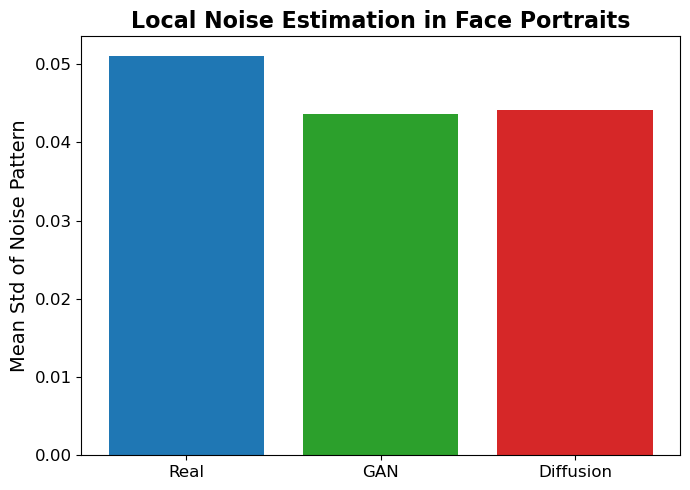


=== Wavelet Noise Energy in Face Portraits ===
Real      Mean Std: 0.05300
GAN       Mean Std: 0.04308
Diffusion Mean Std: 0.03873


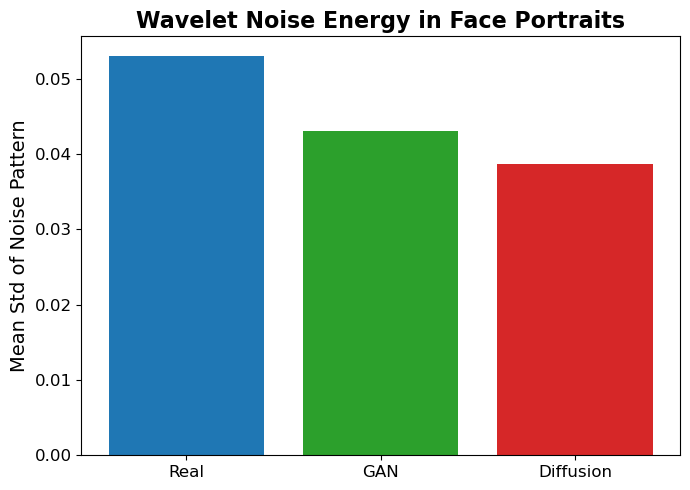

In [12]:
import cv2
import numpy as np
import pywt
import os
import matplotlib.pyplot as plt
from skimage.util import view_as_windows 


def estimate_local_noise(image, window_size=7):
    """Estimate local noise using a sliding window standard deviation"""
    padded_img = np.pad(image, pad_width=window_size//2, mode='reflect')
    windows = view_as_windows(padded_img, (window_size, window_size))
    noise_map = np.std(windows, axis=(2, 3))
    return noise_map


def extract_wavelet_noise(image, wavelet='db1', level=1):
    """Decompose image and return high-frequency noise components"""
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    noise_energy = np.sqrt(cH**2 + cV**2 + cD**2)
    return noise_energy


def process_folder(folder_path, method='local_noise', window_size=7, wavelet='db1'):
    noise_patterns = []
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = img.astype(np.float32) / 255.0

        if method == 'local_noise':
            noise_map = estimate_local_noise(img, window_size)
        elif method == 'wavelet':
            noise_map = extract_wavelet_noise(img, wavelet)
        else:
            raise ValueError("Unsupported method")

        noise_patterns.append(noise_map)
    return noise_patterns


def summarize_and_plot(real_np, gan_np, diff_np, title):
    real_std = np.mean([np.std(p) for p in real_np])
    gan_std  = np.mean([np.std(p) for p in gan_np])
    diff_std = np.mean([np.std(p) for p in diff_np])

    print(f"\n=== {title} ===")
    print(f"Real      Mean Std: {real_std:.5f}")
    print(f"GAN       Mean Std: {gan_std:.5f}")
    print(f"Diffusion Mean Std: {diff_std:.5f}")

    # pick a figure size (width, height) in inches
    fig, ax = plt.subplots(figsize=(7, 5))  

    # your plotting calls
    ax.bar(['Real', 'GAN', 'Diffusion'],
           [real_std, gan_std, diff_std],
           color=['tab:blue', 'tab:green', 'tab:red'])
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel("Mean Std of Noise Pattern", fontsize=14)

    # increase tick label size
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    fig.tight_layout()
    fig.savefig(f"{title.replace(' ', '_').lower()}.pdf", bbox_inches='tight')
    plt.show()


# Example usage
real_images = '../data/BEST/face/real'
gan_images = '../data/BEST/face/stylegan2'
diffusion_images = '../data/BEST/face/palette'

# Local noise
real_ln = process_folder(real_images, method='local_noise')
gan_ln = process_folder(gan_images, method='local_noise')
diff_ln = process_folder(diffusion_images, method='local_noise')
summarize_and_plot(real_ln, gan_ln, diff_ln, "Local Noise Estimation in Face Portraits")

# Wavelet
real_wv = process_folder(real_images, method='wavelet')
gan_wv = process_folder(gan_images, method='wavelet')
diff_wv = process_folder(diffusion_images, method='wavelet')
summarize_and_plot(real_wv, gan_wv, diff_wv, "Wavelet Noise Energy in Face Portraits")


## ImageNet Comparison


=== Local Noise Estimation in ImageNet Dataset ===
Real      Mean Std: 0.07676
GAN       Mean Std: 0.03875
Diffusion Mean Std: 0.05128


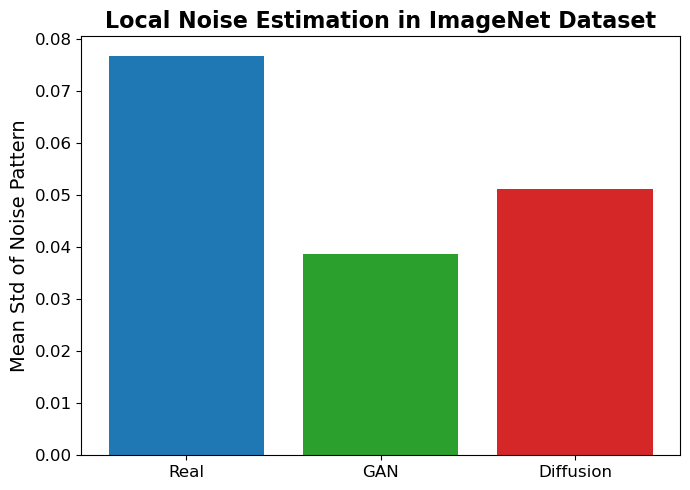


=== Wavelet Noise Energy in ImageNet Dataset ===
Real      Mean Std: 0.09235
GAN       Mean Std: 0.03281
Diffusion Mean Std: 0.05960


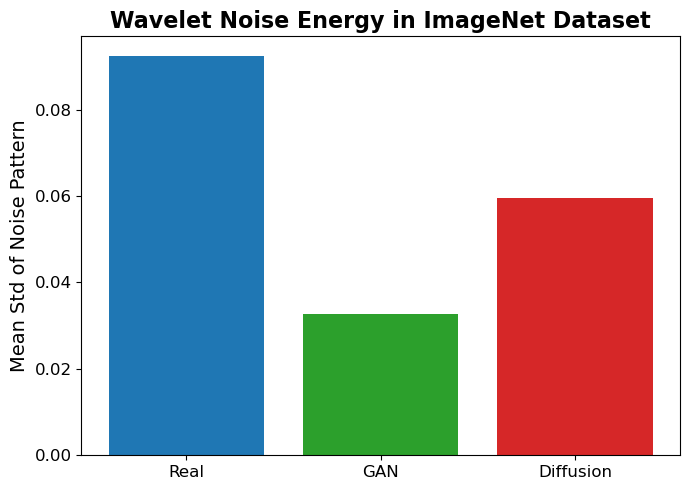

In [10]:
import cv2
import numpy as np
import pywt
import os
import matplotlib.pyplot as plt
from skimage.util import view_as_windows


def estimate_local_noise(image, window_size=7):
    padded_img = np.pad(image, pad_width=window_size//2, mode='reflect')
    windows = view_as_windows(padded_img, (window_size, window_size))
    noise_map = np.std(windows, axis=(2, 3))
    return noise_map


def extract_wavelet_noise(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    noise_energy = np.sqrt(cH**2 + cV**2 + cD**2)
    return noise_energy


def process_all_folders(base_path, method='local_noise', window_size=7, wavelet='db1', pad_width=5):
    noise_patterns = []
    for i in range(1000):
        folder_id = f"{i:0{pad_width}d}"  # padded folder name
        folder_path = os.path.join(base_path, folder_id)
        if not os.path.exists(folder_path):
            continue

        for file_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = img.astype(np.float32) / 255.0

            if method == 'local_noise':
                noise_map = estimate_local_noise(img, window_size)
            elif method == 'wavelet':
                noise_map = extract_wavelet_noise(img, wavelet)
            else:
                raise ValueError("Unsupported method")

            noise_patterns.append(noise_map)
    return noise_patterns


def summarize_and_plot(real_np, gan_np, diff_np, title):
    real_std = np.mean([np.std(p) for p in real_np])
    gan_std  = np.mean([np.std(p) for p in gan_np])
    diff_std = np.mean([np.std(p) for p in diff_np])

    print(f"\n=== {title} ===")
    print(f"Real      Mean Std: {real_std:.5f}")
    print(f"GAN       Mean Std: {gan_std:.5f}")
    print(f"Diffusion Mean Std: {diff_std:.5f}")

    # pick a figure size (width, height) in inches
    fig, ax = plt.subplots(figsize=(7, 5))  

    # your plotting calls
    ax.bar(['Real', 'GAN', 'Diffusion'],
           [real_std, gan_std, diff_std],
           color=['tab:blue', 'tab:green', 'tab:red'])
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel("Mean Std of Noise Pattern", fontsize=14)

    # increase tick label size
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    fig.tight_layout()
    fig.savefig(f"{title.replace(' ', '_').lower()}.pdf", bbox_inches='tight')
    plt.show()


# Define base paths
real_base = '../data/BEST/imagenet/real_imagenet'
gan_base = '../data/BEST/imagenet/big_gan'
diff_base = '../data/BEST/imagenet/vq_diffusion'

# Local noise
real_ln = process_all_folders(real_base, method='local_noise', pad_width=5)
gan_ln = process_all_folders(gan_base, method='local_noise', pad_width=1)
diff_ln = process_all_folders(diff_base, method='local_noise', pad_width=1)
summarize_and_plot(real_ln, gan_ln, diff_ln, "Local Noise Estimation in ImageNet Dataset")

# Wavelet noise
real_wv = process_all_folders(real_base, method='wavelet', pad_width=5)
gan_wv = process_all_folders(gan_base, method='wavelet', pad_width=1)
diff_wv = process_all_folders(diff_base, method='wavelet', pad_width=1)
summarize_and_plot(real_wv, gan_wv, diff_wv, "Wavelet Noise Energy in ImageNet Dataset")

## T-test

In [22]:
import os
import cv2
import numpy as np
import pywt
from skimage.util import view_as_windows
from scipy.stats import ttest_ind, f_oneway, kruskal

# ─── 1) NOISE‐ESTIMATION FUNCTIONS ────────────────────────────────────────────

def estimate_local_noise(image, window_size=7):
    padded = np.pad(image, window_size//2, mode='reflect')
    windows = view_as_windows(padded, (window_size, window_size))
    return np.std(windows, axis=(2,3))

def extract_wavelet_noise(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    return np.sqrt(cH**2 + cV**2 + cD**2)

# ─── 2) FOLDER PROCESSING ─────────────────────────────────────────────────────

def process_folder(folder_path, method='local_noise', window_size=7, wavelet='db1'):
    """Flat folder of images (Bedroom, Face)."""
    patterns = []
    for fn in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, fn), cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = img.astype(np.float32) / 255.0
        if method=='local_noise':
            patterns.append(estimate_local_noise(img, window_size))
        else:
            patterns.append(extract_wavelet_noise(img, wavelet))
    return patterns

def process_all_folders(base_path, method='local_noise', window_size=7, wavelet='db1', pad_width=5):
    """Nested folders 00000–00999 or 0–999 (ImageNet)."""
    patterns = []
    for i in range(1000):
        sub = f"{i:0{pad_width}d}"
        path = os.path.join(base_path, sub)
        if not os.path.isdir(path):
            continue
        for fn in os.listdir(path):
            img = cv2.imread(os.path.join(path, fn), cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = img.astype(np.float32) / 255.0
            if method=='local_noise':
                patterns.append(estimate_local_noise(img, window_size))
            else:
                patterns.append(extract_wavelet_noise(img, wavelet))
    return patterns

# ─── 3) STATISTICS HELPERS ────────────────────────────────────────────────────

def metrics_from_patterns(patterns):
    return np.array([np.std(p) for p in patterns])

def pairwise_t(A, B, label):
    t, p = ttest_ind(A, B, equal_var=False)
    print(f"  {label:20s} t = {t:+.3f}, p = {p:.3e}")

def run_tests(real_m, gan_m, diff_m, title):
    print(f"\n=== {title} ===")
    if len(real_m)==0 or len(gan_m)==0 or len(diff_m)==0:
        print("  ⚠️ One of the groups is empty—check your paths/padding.")
        return
    # Pairwise
    print("Pairwise Welch’s t-tests:")
    pairwise_t(real_m, gan_m,   "Real vs GAN")
    pairwise_t(real_m, diff_m,  "Real vs Diffusion")
    pairwise_t(gan_m,  diff_m,  "GAN vs Diffusion")
    # ANOVA
    F, p = f_oneway(real_m, gan_m, diff_m)
    print(f"\nOne-way ANOVA: F = {F:.3f}, p = {p:.3e}")
    # Non-parametric
    H, pH = kruskal(real_m, gan_m, diff_m)
    print(f"Kruskal–Wallis: H = {H:.3f}, p = {pH:.3e}")

# ─── 4) RUN FOR EACH DATASET & METHOD ────────────────────────────────────────

datasets = {
    'Bedroom': {
        'real':      {'path': '../data/BEST/bedroom/real',         'proc': process_folder, 'pad': 5},
        'gan':       {'path': '../data/BEST/bedroom/gansformer',   'proc': process_folder, 'pad': 5},
        'diffusion': {'path': '../data/BEST/bedroom/ddpm',         'proc': process_folder, 'pad': 5},
    },
    'Face Portraits': {
        'real':      {'path': '../data/BEST/face/real',         'proc': process_folder},
        'gan':       {'path': '../data/BEST/face/stylegan2',    'proc': process_folder},
        'diffusion': {'path': '../data/BEST/face/palette',      'proc': process_folder},
    },
    'ImageNet Dataset': {
        'real':      {'path': '../data/BEST/everything/real_imagenet', 'proc': process_all_folders, 'pad':5},
        'gan':       {'path': '../data/BEST/everything/big_gan',       'proc': process_all_folders, 'pad':1},
        'diffusion': {'path': '../data/BEST/everything/vq_diffusion',  'proc': process_all_folders, 'pad':1},
    }
}

for ds_name, groups in datasets.items():
    for method, pretty in [('local_noise', 'Local Noise'), ('wavelet', 'Wavelet Noise')]:
        # 1) Compute noise‐patterns
        pats = {}
        for label, info in groups.items():
            if info['proc'] is process_folder:
                pats[label] = info['proc'](info['path'], method=method)
            else:
                pats[label] = info['proc'](
                    info['path'], method=method, pad_width=info['pad']
                )
        # 2) Convert to 1D metrics
        metrics = {k: metrics_from_patterns(v) for k,v in pats.items()}
        # 3) Run statistics
        run_tests(metrics['real'], metrics['gan'], metrics['diffusion'],
                  f"{pretty} in {ds_name}")


=== Local Noise in Bedroom ===
Pairwise Welch’s t-tests:
  Real vs GAN          t = +36.488, p = 1.822e-273
  Real vs Diffusion    t = +14.994, p = 4.013e-46
  GAN vs Diffusion     t = -3.135, p = 1.769e-03

One-way ANOVA: F = 682.559, p = 8.166e-280
Kruskal–Wallis: H = 1180.557, p = 4.418e-257

=== Wavelet Noise in Bedroom ===
Pairwise Welch’s t-tests:
  Real vs GAN          t = +59.053, p = 0.000e+00
  Real vs Diffusion    t = +27.824, p = 3.258e-133
  GAN vs Diffusion     t = -4.919, p = 1.030e-06

One-way ANOVA: F = 1835.102, p = 0.000e+00
Kruskal–Wallis: H = 2844.749, p = 0.000e+00

=== Local Noise in Face Portraits ===
Pairwise Welch’s t-tests:
  Real vs GAN          t = +41.310, p = 0.000e+00
  Real vs Diffusion    t = +36.344, p = 1.921e-274
  GAN vs Diffusion     t = -3.113, p = 1.857e-03

One-way ANOVA: F = 1038.163, p = 0.000e+00
Kruskal–Wallis: H = 1927.746, p = 0.000e+00

=== Wavelet Noise in Face Portraits ===
Pairwise Welch’s t-tests:
  Real vs GAN          t = +47.458,

## Qualitative Results

/var/folders/hf/2qw6xpcx1b51ntgj8ss0d90r0000gn/T/ipykernel_18647/2333837486.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(0,0,0.9,1))


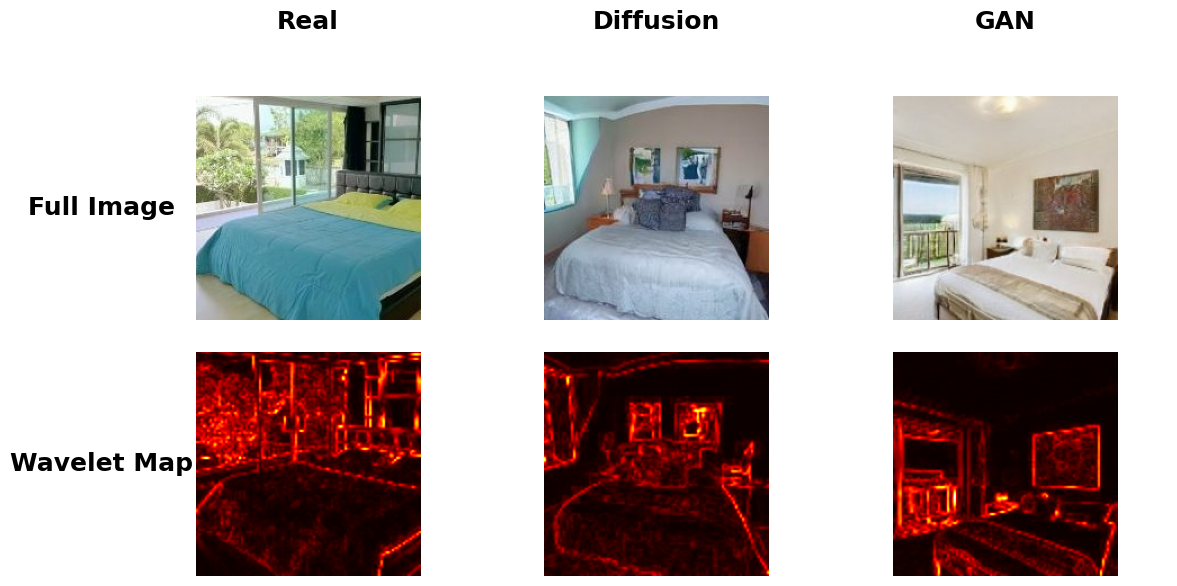

Saved figure to qual_figure_wavelet_bed.pdf


In [ ]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage.util import view_as_windows
from matplotlib import gridspec

def estimate_local_noise(image, window_size=7):
    padded = np.pad(image, window_size//2, mode='reflect')
    windows = view_as_windows(padded, (window_size, window_size))
    return np.std(windows, axis=(2,3))

def extract_wavelet_noise(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    return np.sqrt(cH**2 + cV**2 + cD**2)

def load_color(p):
    bgr = cv2.imread(p, cv2.IMREAD_COLOR)
    if bgr is None:
        raise FileNotFoundError(f"Cannot load {p}")
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb.astype(np.float32)/255.0

def load_gray(p):
    g = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    if g is None:
        raise FileNotFoundError(f"Cannot load {p}")
    return g.astype(np.float32)/255.0

def plot_noise_horizontal(fp_real, fp_diff, fp_gan,
                          method='wavelet', out_pdf='figure3.pdf'):
    #── load images/maps ────────────────────────────────────
    real_col, real_gray = load_color(fp_real), load_gray(fp_real)
    diff_col, diff_gray = load_color(fp_diff), load_gray(fp_diff)
    gan_col,  gan_gray  = load_color(fp_gan),  load_gray(fp_gan)

    fn = estimate_local_noise if method=='local_noise' else extract_wavelet_noise
    real_map = fn(real_gray); diff_map = fn(diff_gray); gan_map = fn(gan_gray)

    #── upsample maps to match original size ────────────────
    def up(img, nm):
        if nm.shape != img.shape[:2]:
            nm = cv2.resize(nm, img.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
        return nm
    real_map = up(real_col, real_map)
    diff_map = up(diff_col, diff_map)
    gan_map  = up(gan_col,  gan_map)

    vmin, vmax = 0.0, max(real_map.max(), diff_map.max(), gan_map.max())

    #── build figure + gridspec ─────────────────────────────
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(
        nrows=3, ncols=4,
        width_ratios=[0.12,1,1,1],
        height_ratios=[0.12,1,1],
        hspace=0.2, wspace=0.1
    )

    # Column headers
    for col, lbl in enumerate(['Real','Diffusion','GAN'], start=1):
        ax = fig.add_subplot(gs[0, col])
        ax.set_title(lbl, fontsize=18, weight='bold')
        ax.axis('off')

    # Row‐labels + content
    rows = [
        ('Full Image', [real_col, diff_col, gan_col]),
        ('Wavelet Map', [real_map, diff_map, gan_map])
    ]

    for r, (y_label, imgs) in enumerate(rows, start=1):
        # y-axis label
        ax_lbl = fig.add_subplot(gs[r, 0])
        ax_lbl.text(0.5, 0.5, y_label, ha='center', va='center',
                    fontsize=18, weight='bold')
        ax_lbl.axis('off')

        # plot each panel
        for c, img in enumerate(imgs, start=1):
            ax = fig.add_subplot(gs[r, c])
            if r == 1:
                ax.imshow(img)
            else:
                im = ax.imshow(img, cmap='hot', vmin=vmin, vmax=vmax)
            ax.axis('off')

    fig.tight_layout(rect=(0,0,0.9,1))
    fig.savefig(out_pdf, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved figure to {out_pdf}")

# 1) Gather a list of image paths for each model:
base = '../data/BEST/bedroom'
paths_gan  = [os.path.join(base, 'gansformer', fn)
               for fn in os.listdir(os.path.join(base,'gansformer'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_diff = [os.path.join(base, 'ddpm', fn)
               for fn in os.listdir(os.path.join(base,'ddpm'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_real = [os.path.join(base, 'real_200x200', fn)
               for fn in os.listdir(os.path.join(base,'real_200x200'))
               if fn.lower().endswith(('.png','.jpg'))]

chosen_gan  = paths_gan[30]
chosen_diff = paths_diff[64]
chosen_real = paths_real[40]

# 59

plot_noise_horizontal(chosen_real, chosen_diff, chosen_gan, method='wavelet', out_pdf = 'qual_figure_wavelet_bed.pdf')

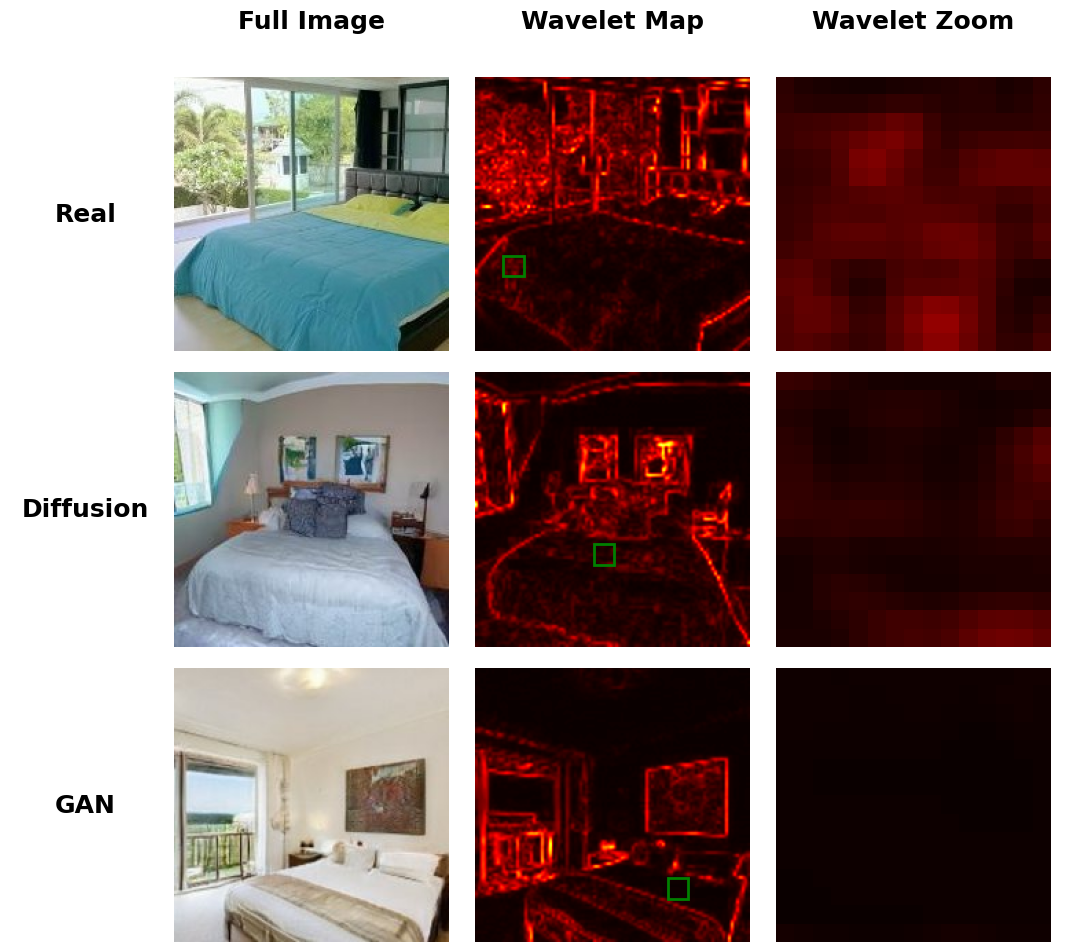

In [312]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cv2
import numpy as np
import pywt

def plot_wavelet_zoom_map(image_paths, labels, zoom_boxes, zoom_scale=2, save_path=None):
    """
    Displays for each image (Real, GAN, Diffusion):
      - Full RGB image with red rectangle indicating zoom‐area
      - Zoom‐in of the wavelet‐noise map in that area
      - Full wavelet‐noise map
    """
    fig = plt.figure(figsize=(17, 10))
    gs = gridspec.GridSpec(
        nrows=4, ncols=4,
        width_ratios=[0.5, 1, 1, 1],
        height_ratios=[0.05, 1, 1, 1],
        wspace=0, 
        hspace=0.1
    )

    # Column titles
    titles = ["Full Image", "Wavelet Map", "Wavelet Zoom"]
    for i, title in enumerate(titles):
        ax = fig.add_subplot(gs[0, i+1])
        ax.set_title(title, fontsize=18, weight='bold', pad=10)
        ax.axis("off")

    def wavelet_noise(img_gray, wavelet='db1', level=1):
        coeffs = pywt.wavedec2(img_gray, wavelet=wavelet, level=level)
        _, (cH, cV, cD) = coeffs
        wmap = np.sqrt(cH**2 + cV**2 + cD**2)
        # Normalize to [0,1]
        return (wmap - wmap.min()) / (wmap.max() - wmap.min() + 1e-8)

    for row, (path, label, (x, y, w, h)) in enumerate(zip(image_paths, labels, zoom_boxes), start=1):
        # Load color + gray
        color = cv2.imread(path)
        if color is None:
            raise FileNotFoundError(path)
        color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
        gray  = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY).astype(np.float32)/255.0

        # Full wavelet map (upsampled)
        wmap = wavelet_noise(gray)
        wmap = cv2.resize(wmap, (color.shape[1], color.shape[0]), interpolation=cv2.INTER_LINEAR)

        # Extract zoom patch from wmap
        patch = wmap[y:y+h, x:x+w]
        patch_zoom = cv2.resize(patch, (w*zoom_scale, h*zoom_scale), interpolation=cv2.INTER_NEAREST)

        # Left label
        ax_lbl = fig.add_subplot(gs[row, 0])
        ax_lbl.text(0.5, 0.5, label, va='center', ha='center', fontsize=18, weight='bold')
        ax_lbl.axis("off")

        # 1) Full RGB image with zoom rectangle
        ax0 = fig.add_subplot(gs[row, 1])
        ax0.imshow(color)
        ax0.axis("off")

        # 3) Full wavelet map
        ax1 = fig.add_subplot(gs[row, 2])
        ax1.imshow(wmap, cmap='hot', vmin=0, vmax=1)
        ax1.add_patch(plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', lw=2))
        ax1.axis("off")

        # 2) Zoom-in of wavelet map
        ax2 = fig.add_subplot(gs[row, 3])
        ax2.imshow(patch_zoom, cmap='hot', vmin=0, vmax=1)
        ax2.axis("off")

    plt.subplots_adjust(left=0.02, right=0.64, top=0.95, bottom=0.05)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

base = '../data/BEST/bedroom'
paths_gan  = [os.path.join(base, 'gansformer', fn)
               for fn in os.listdir(os.path.join(base,'gansformer'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_diff = [os.path.join(base, 'ddpm', fn)
               for fn in os.listdir(os.path.join(base,'ddpm'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_real = [os.path.join(base, 'real_200x200', fn)
               for fn in os.listdir(os.path.join(base,'real_200x200'))
               if fn.lower().endswith(('.png','.jpg'))]

chosen_gan  = paths_gan[30]
chosen_diff = paths_diff[64]
chosen_real = paths_real[40]

plot_wavelet_zoom_map(
    image_paths=[
        chosen_real,
        chosen_diff,
        chosen_gan
    ],
    labels=["Real", "Diffusion", "GAN"],
    zoom_boxes=[(20, 130, 15, 15), (86, 125, 15, 15), (140, 153, 15, 15)],
    zoom_scale=2,
    save_path="wavelet_comparison_bedroom.pdf"
)

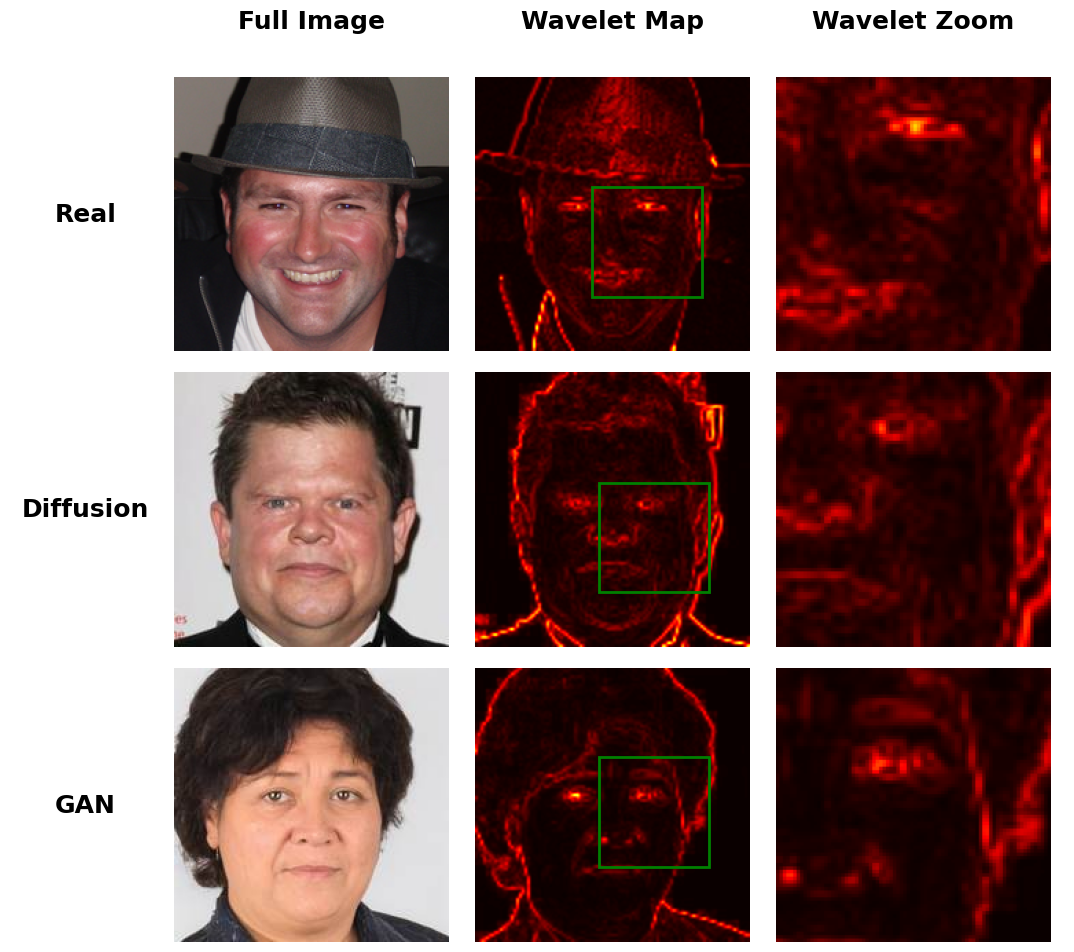

In [313]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cv2
import numpy as np
import pywt

def plot_wavelet_zoom_map(image_paths, labels, zoom_boxes, zoom_scale=2, save_path=None):
    """
    Displays for each image (Real, GAN, Diffusion):
      - Full RGB image with red rectangle indicating zoom‐area
      - Zoom‐in of the wavelet‐noise map in that area
      - Full wavelet‐noise map
    """
    fig = plt.figure(figsize=(17, 10))
    gs = gridspec.GridSpec(
        nrows=4, ncols=4,
        width_ratios=[0.5, 1, 1, 1],
        height_ratios=[0.05, 1, 1, 1],
        wspace=0, 
        hspace=0.1
    )

    # Column titles
    titles = ["Full Image", "Wavelet Map", "Wavelet Zoom"]
    for i, title in enumerate(titles):
        ax = fig.add_subplot(gs[0, i+1])
        ax.set_title(title, fontsize=18, weight='bold', pad=10)
        ax.axis("off")

    def wavelet_noise(img_gray, wavelet='db1', level=1):
        coeffs = pywt.wavedec2(img_gray, wavelet=wavelet, level=level)
        _, (cH, cV, cD) = coeffs
        wmap = np.sqrt(cH**2 + cV**2 + cD**2)
        # Normalize to [0,1]
        return (wmap - wmap.min()) / (wmap.max() - wmap.min() + 1e-8)

    for row, (path, label, (x, y, w, h)) in enumerate(zip(image_paths, labels, zoom_boxes), start=1):
        # Load color + gray
        color = cv2.imread(path)
        if color is None:
            raise FileNotFoundError(path)
        color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
        gray  = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY).astype(np.float32)/255.0

        # Full wavelet map (upsampled)
        wmap = wavelet_noise(gray)
        wmap = cv2.resize(wmap, (color.shape[1], color.shape[0]), interpolation=cv2.INTER_LINEAR)

        # Extract zoom patch from wmap
        patch = wmap[y:y+h, x:x+w]
        patch_zoom = cv2.resize(patch, (w*zoom_scale, h*zoom_scale), interpolation=cv2.INTER_NEAREST)

        # Left label
        ax_lbl = fig.add_subplot(gs[row, 0])
        ax_lbl.text(0.5, 0.5, label, va='center', ha='center', fontsize=18, weight='bold')
        ax_lbl.axis("off")

        # 1) Full RGB image with zoom rectangle
        ax0 = fig.add_subplot(gs[row, 1])
        ax0.imshow(color)
        ax0.axis("off")

        # 3) Full wavelet map
        ax1 = fig.add_subplot(gs[row, 2])
        ax1.imshow(wmap, cmap='hot', vmin=0, vmax=1)
        ax1.add_patch(plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', lw=2))
        ax1.axis("off")

        # 2) Zoom-in of wavelet map
        ax2 = fig.add_subplot(gs[row, 3])
        ax2.imshow(patch_zoom, cmap='hot', vmin=0, vmax=1)
        ax2.axis("off")

    plt.subplots_adjust(left=0.02, right=0.64, top=0.95, bottom=0.05)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

base = '../data/BEST/face'
paths_gan  = [os.path.join(base, 'stylegan2', fn)
               for fn in os.listdir(os.path.join(base,'stylegan2'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_diff = [os.path.join(base, 'palette', fn)
               for fn in os.listdir(os.path.join(base,'palette'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_real = [os.path.join(base, 'real', fn)
               for fn in os.listdir(os.path.join(base,'real'))
               if fn.lower().endswith(('.png','.jpg'))]

chosen_diff = paths_diff[21]
chosen_gan  = paths_gan[12]
chosen_real = paths_real[48]

plot_wavelet_zoom_map(
    image_paths=[
        chosen_real,
        chosen_diff,
        chosen_gan
    ],
    labels=["Real", "Diffusion", "GAN"],
    zoom_boxes=[(85, 80, 80, 80), (90, 80, 80, 80), (90, 65, 80, 80)],
    zoom_scale=2,
    save_path="wavelet_comparison_face.pdf"
)

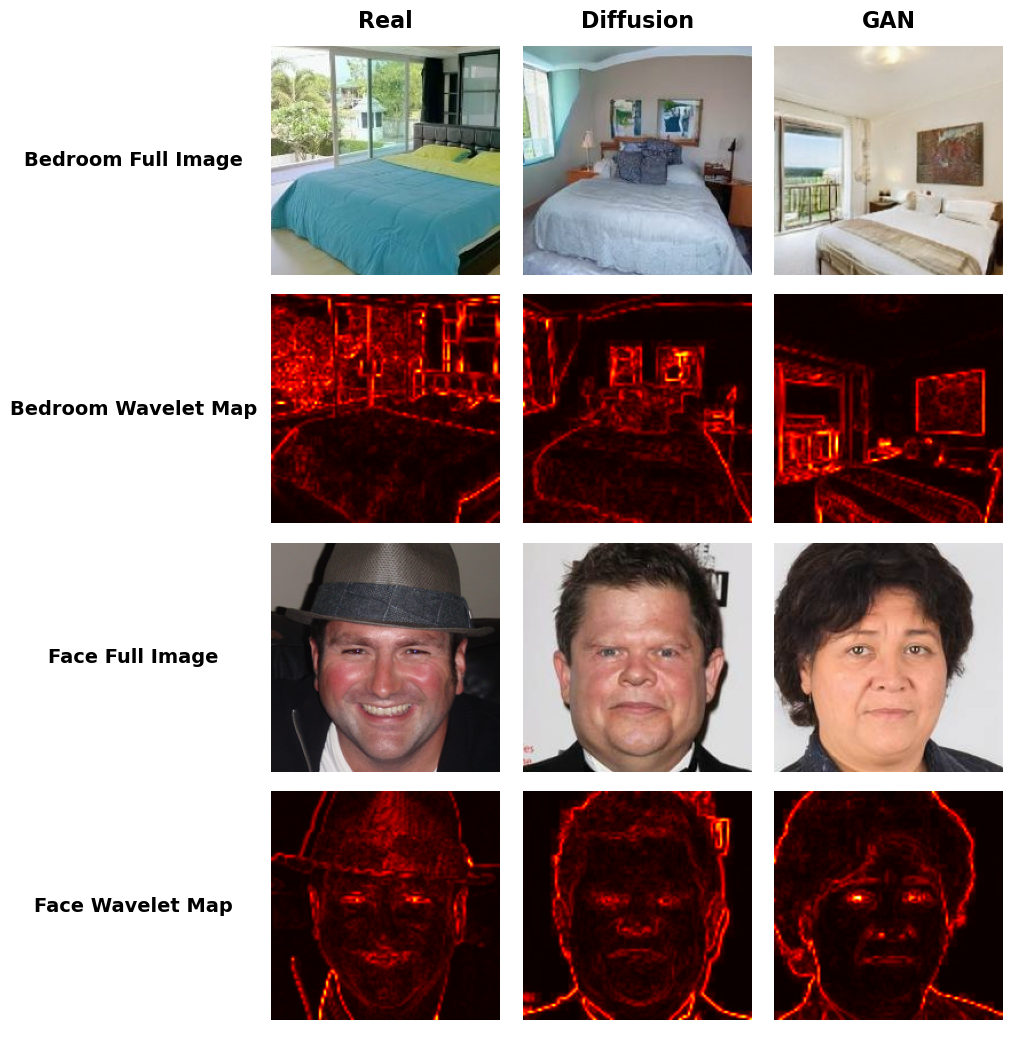

In [244]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage.util import view_as_windows
from matplotlib import gridspec

# ─── Utility functions ─────────────────────────────────────────────────────────

def load_color(path):
    bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    if bgr is None:
        raise FileNotFoundError(f"Cannot load {path}")
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb.astype(np.float32)/255.0

def load_gray(path):
    g = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if g is None:
        raise FileNotFoundError(f"Cannot load {path}")
    return g.astype(np.float32)/255.0

def extract_wavelet_noise(img, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(img, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    return np.sqrt(cH**2 + cV**2 + cD**2)

def upsample_to(img, arr):
    if arr.shape != img.shape[:2]:
        arr = cv2.resize(arr, img.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
    return arr

# ─── Paths for your two chosen examples ─────────────────────────────────────────

base_face = '../data/BEST/face'
paths_gan  = [os.path.join(base_face, 'stylegan2', fn)
               for fn in os.listdir(os.path.join(base_face,'stylegan2'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_diff = [os.path.join(base_face, 'palette', fn)
               for fn in os.listdir(os.path.join(base_face,'palette'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_real = [os.path.join(base_face, 'real', fn)
               for fn in os.listdir(os.path.join(base_face,'real'))
               if fn.lower().endswith(('.png','.jpg'))]

face_diff = paths_diff[21]
face_gan  = paths_gan[12]
face_real = paths_real[48]

base_bed = '../data/BEST/bedroom'
paths_gan  = [os.path.join(base_bed, 'gansformer', fn)
               for fn in os.listdir(os.path.join(base_bed,'gansformer'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_diff = [os.path.join(base_bed, 'ddpm', fn)
               for fn in os.listdir(os.path.join(base_bed,'ddpm'))
               if fn.lower().endswith(('.png','.jpg'))]

paths_real = [os.path.join(base_bed, 'real_200x200', fn)
               for fn in os.listdir(os.path.join(base_bed,'real_200x200'))
               if fn.lower().endswith(('.png','.jpg'))]

bed_gan  = paths_gan[30]
bed_diff = paths_diff[64]
bed_real = paths_real[40]

# ─── Load images & compute maps ────────────────────────────────────────────────

# Bedroom
bR_col, bR_gray = load_color(bed_real), load_gray(bed_real)
bD_col, bD_gray = load_color(bed_diff), load_gray(bed_diff)
bG_col, bG_gray = load_color(bed_gan),  load_gray(bed_gan)

# Face
fR_col, fR_gray = load_color(face_real), load_gray(face_real)
fD_col, fD_gray = load_color(face_diff), load_gray(face_diff)
fG_col, fG_gray = load_color(face_gan),  load_gray(face_gan)

# Wavelet maps
bR_map = upsample_to(bR_col, extract_wavelet_noise(bR_gray))
bD_map = upsample_to(bD_col, extract_wavelet_noise(bD_gray))
bG_map = upsample_to(bG_col, extract_wavelet_noise(bG_gray))

fR_map = upsample_to(fR_col, extract_wavelet_noise(fR_gray))
fD_map = upsample_to(fD_col, extract_wavelet_noise(fD_gray))
fG_map = upsample_to(fG_col, extract_wavelet_noise(fG_gray))

# Determine a common color scale
vmax = max(bR_map.max(), bD_map.max(), bG_map.max(),
           fR_map.max(), fD_map.max(), fG_map.max())
vmin = 0.0

# ─── Plot combined figure ──────────────────────────────────────────────────────

fig = plt.figure(figsize=(12, 14))
gs = gridspec.GridSpec(
    nrows=5, ncols=4,
    height_ratios=[0, 1, 1, 1, 1],
    width_ratios=[1, 1, 1, 1],
    hspace=0, wspace=0.1
)

# Column headers
for col, lbl in enumerate(['Real','Diffusion','GAN'], start=1):
    ax = fig.add_subplot(gs[0, col])
    ax.set_title(lbl, fontsize=16, weight='bold')
    ax.axis('off')

# Row labels & content
rows = [
    ('Bedroom Full Image',    [bR_col, bD_col, bG_col]),
    ('Bedroom Wavelet Map',   [bR_map, bD_map, bG_map]),
    ('Face Full Image',       [fR_col, fD_col, fG_col]),
    ('Face Wavelet Map',      [fR_map, fD_map, fG_map])
]

for r, (label, imgs) in enumerate(rows, start=1):
    # Y-axis label
    ax_lbl = fig.add_subplot(gs[r, 0])
    ax_lbl.text(0.5, 0.5, label, ha='center', va='center',
                fontsize=14, weight='bold')
    ax_lbl.axis('off')

    # Plot each panel
    for c, img in enumerate(imgs, start=1):
        ax = fig.add_subplot(gs[r, c])
        if r % 2 == 1:  # full image rows
            ax.imshow(img)
        else:           # wavelet map rows
            im = ax.imshow(img, cmap='hot', vmin=vmin, vmax=vmax)
        ax.axis('off')

fig.subplots_adjust(
    left=0.18,   # push grid right for y-labels
    right=1,  # leave space for potential colorbar
    top=0.73,    # tuck header row up
    bottom=0.02, # tuck last row down
    hspace=0.0  # actual vertical spacing now
)
plt.savefig('qual_figure_wavelet_combined.pdf', dpi=300, bbox_inches='tight')
plt.show()

## PCA

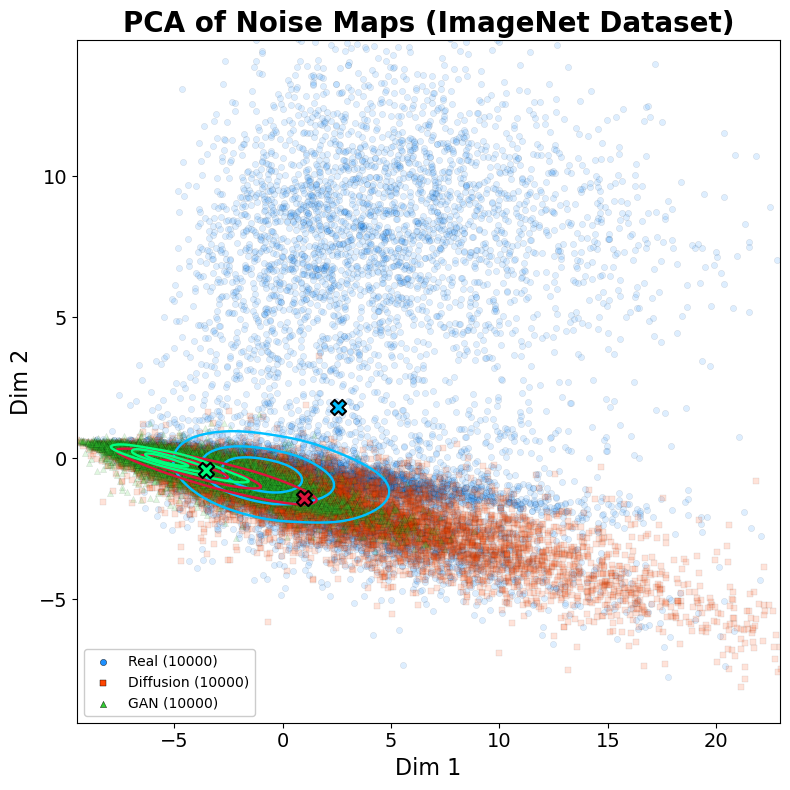

In [17]:
import os
import cv2
import numpy as np
import pywt
from skimage.util import view_as_windows
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

# -------------------------------------------------------
# 1) Noise‐estimation functions
# -------------------------------------------------------
def estimate_local_noise(image, window_size=7):
    padded = np.pad(image, window_size//2, mode='reflect')
    windows = view_as_windows(padded, (window_size, window_size))
    return np.std(windows, axis=(2,3))

def extract_wavelet_noise(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    _, (cH, cV, cD) = coeffs
    return np.sqrt(cH**2 + cV**2 + cD**2)

# -------------------------------------------------------
# 2) Folder‐walker that collects flattened noise maps
# -------------------------------------------------------
def process_all_folders(base_path, method='wavelet', pad_width=5):
    maps = []
    for i in range(1000):
        sub = f"{i:0{pad_width}d}"
        folder = os.path.join(base_path, sub)
        if not os.path.isdir(folder):
            continue
        for fn in os.listdir(folder):
            if not fn.lower().endswith(('.png','jpg','jpeg','bmp','tiff')):
                continue
            img = cv2.imread(os.path.join(folder, fn), cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = img.astype(np.float32) / 255.0
            nm = (estimate_local_noise(img) if method=='local_noise'
                  else extract_wavelet_noise(img))
            if nm.shape != img.shape:
                nm = cv2.resize(nm, img.shape[::-1], interpolation=cv2.INTER_LINEAR)
            maps.append(nm.flatten())
    if not maps:
        raise RuntimeError(f"No images found under {base_path}")
    return np.vstack(maps)

# -------------------------------------------------------
# 3) Paths to your subsets
# -------------------------------------------------------
real_base = '../data/BEST/imagenet/real_imagenet'
gan_base  = '../data/BEST/imagenet/big_gan'
diff_base = '../data/BEST/imagenet/vq_diffusion'

# -------------------------------------------------------
# 4) Load & stack
# -------------------------------------------------------
real_maps = process_all_folders(real_base,  method='wavelet', pad_width=5)
gan_maps  = process_all_folders(gan_base,   method='wavelet', pad_width=1)
diff_maps = process_all_folders(diff_base,  method='wavelet', pad_width=1)

X = np.vstack([real_maps, gan_maps, diff_maps])
y = np.array(
    ['Real']*real_maps.shape[0] +
    ['GAN']*gan_maps.shape[0] +
    ['Diffusion']*diff_maps.shape[0]
)

# -------------------------------------------------------
# 5) Plotting helper with opaque contours & centroids
# -------------------------------------------------------
def plot_embedding(X_emb, labels, title):
    plt.figure(figsize=(8,8))
    markers      = {'Real':'o', 'GAN':'^', 'Diffusion':'s'}
    point_cols   = {'Real':'dodgerblue', 'GAN':'limegreen', 'Diffusion':'orangered'}
    contour_cols = {'Real':'deepskyblue', 'GAN':'springgreen', 'Diffusion':'crimson'}

    for name in ['Real','Diffusion','GAN']:
        pts = X_emb[labels == name]
        # faint background points
        plt.scatter(pts[:,0], pts[:,1],
                    c=point_cols[name], marker=markers[name],
                    s=20, alpha=0.15, edgecolor='k', linewidth=0.3,
                    label=f"{name} ({pts.shape[0]})", zorder=1)

        # KDE density contours on a finer grid
        kde = gaussian_kde(pts.T)
        xi, yi = np.mgrid[
            pts[:,0].min():pts[:,0].max():300j,
            pts[:,1].min():pts[:,1].max():300j
        ]
        zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)

        # draw three solid, fully opaque contours
        for lvl in [0.5, 0.75, 0.9]:
            plt.contour(
                xi, yi, zi,
                levels=[zi.max()*lvl],
                colors=[contour_cols[name]],
                linestyles='solid',
                linewidths=1.75,
                alpha=1.0,
                zorder=2
            )

        # centroid marker
        cx, cy = pts.mean(axis=0)
        plt.scatter(cx, cy,
                    c=contour_cols[name], marker='X', s=120,
                    edgecolor='k', linewidth=1.5,
                    alpha=1.0, zorder=3)

    # opaque legend
    lg = plt.legend(loc='best', frameon=True, framealpha=1.0)
    for lh in lg.legend_handles:
        lh.set_alpha(1.0)

    xmin, xmax = np.percentile(X_emb[:,0], [0, 99.75])
    ymin, ymax = np.percentile(X_emb[:,1], [0, 99.75])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel('Dim 1', fontsize=16)
    plt.ylabel('Dim 2', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"PCA_noise_pattern.pdf", dpi=300)
    plt.show()

# -------------------------------------------------------
# 6) PCA & plot
# -------------------------------------------------------
pca   = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
plot_embedding(X_pca, y, "PCA of Noise Maps (ImageNet Dataset)")